In [3]:
import h2o
import pandas as pd
from h2o.automl import H2OAutoML
# import mathplotlib
# Start the H2O cluster (locally)
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,2 days 14 hours 19 mins
H2O_cluster_timezone:,America/Asuncion
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.1
H2O_cluster_version_age:,3 months and 11 days
H2O_cluster_name:,H2O_from_python_davidnunez_i5gl5y
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.997 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [8]:
model = h2o.load_model('../presentation/StackedEnsemble_AllModels_1_AutoML_1_20230927_154916')

In [9]:
y = 'Protestas'
df_2023 = pd.read_csv('../presentation/test_2023.csv', index_col=False)

test = h2o.H2OFrame.from_python(df_2023)
test[y] = test[y].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [10]:
# model.show()
# confusion_matrix(metrics=None, thresholds=None)
model.model_performance(test).confusion_matrix()

,False,True,Error,Rate
False,7097.0,824.0,0.104,(824.0/7921.0)
True,673.0,2175.0,0.2363,(673.0/2848.0)
Total,7770.0,2999.0,0.139,(1497.0/10769.0)


In [11]:
model.model_performance(test).aucpr()

0.8306719918587014

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_1_20230927_154916

,False,True,Error,Rate
False,7097.0,824.0,0.104,(824.0/7921.0)
True,673.0,2175.0,0.2363,(673.0/2848.0)
Total,7770.0,2999.0,0.139,(1497.0/10769.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

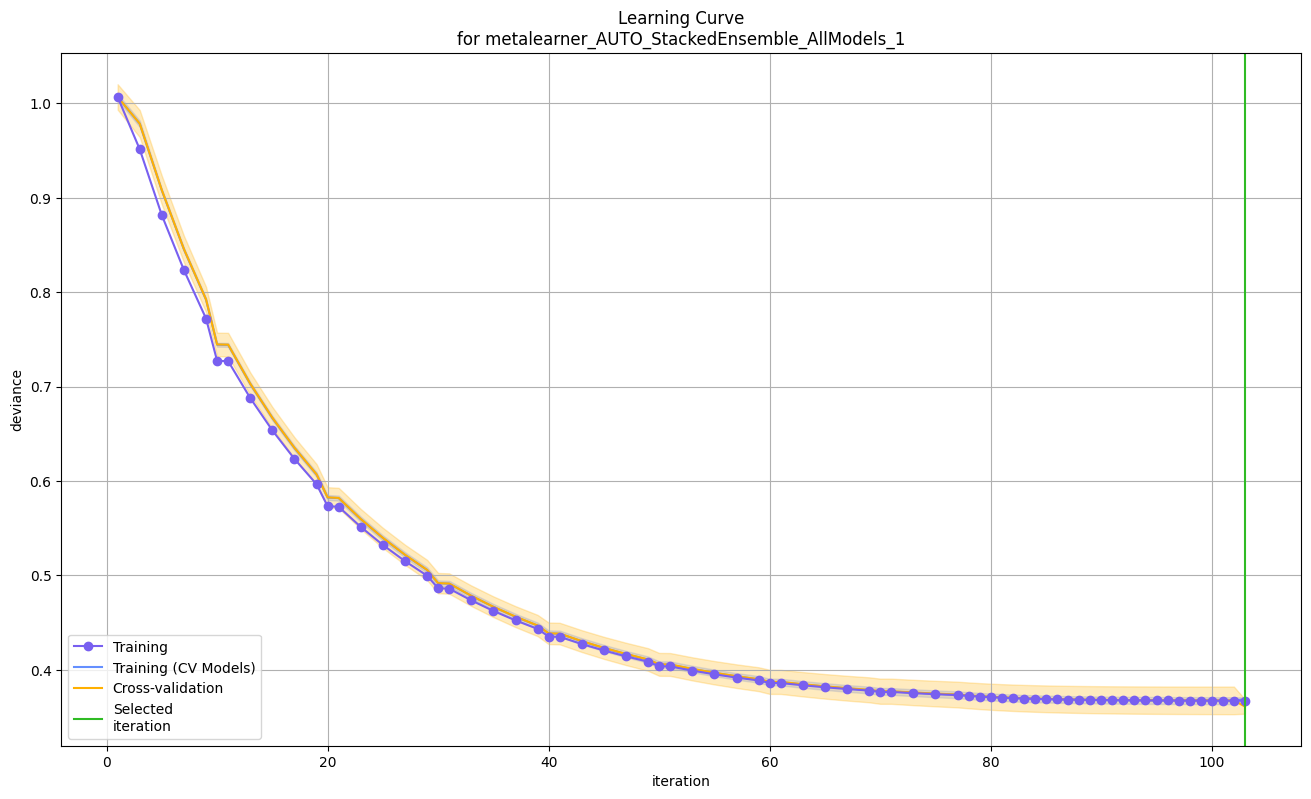

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [12]:
model.explain(test)

In [38]:
h2o.get_model('StackedEnsemble_BestOfFamily_1_AutoML_8_20230801_04034').model_performance(test).confusion_matrix()

,False,True,Error,Rate
False,16922.0,1744.0,0.0934,(1744.0/18666.0)
True,1479.0,1839.0,0.4458,(1479.0/3318.0)
Total,18401.0,3583.0,0.1466,(3223.0/21984.0)


In [30]:
cm[1][1] / (cm[1][0] + cm[1][1])


0.5533453887884268

In [37]:
type(drf)

h2o.estimators.random_forest.H2ORandomForestEstimator

In [36]:
drf.model_performance(test).recall()[0][0]


0.012416331904275081